In [1]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
start = dt.datetime(2018,1,1)



stockList = ['PETR4.SA']

df = pd.DataFrame()
for i in stockList:
    df = web.DataReader(i, 'yahoo', start)

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,15.793664
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,15.936812
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,15.965438
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,16.060867
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,16.251730


In [4]:
num_days = 1
df['prediction'] = df['Adj Close'].shift(-num_days)
df.dropna(inplace=True)

In [5]:
X = np.array(df.drop(['prediction'], 1))
Y = np.array(df['prediction'])
X_proc = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

In [6]:
#Performing the Regression on the training data
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)
prediction = (clf.predict(X))

print('Score train {}'.format(clf.score(X_train,Y_train)))
print('Score test {}'.format(clf.score(X_test,Y_test)))
print('Score full {}'.format(clf.score(X,Y)))

Score train 0.9930297842118574
Score test 0.9626677392864569
Score full 0.9688615437132136


C:\Users\renan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
dt_pred = pd.DataFrame()

dt_pred['X'] = X[:,0]
dt_pred['Y_atual'] = Y
dt_pred['Y_pred'] = prediction
dt_aux = pd.DataFrame()
dt_aux['Date'] = df.index
dt_pred['Date'] = dt_aux.iloc[-dt_pred.shape[0]:]
dt_pred.dropna(inplace = True)

C:\Users\renan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


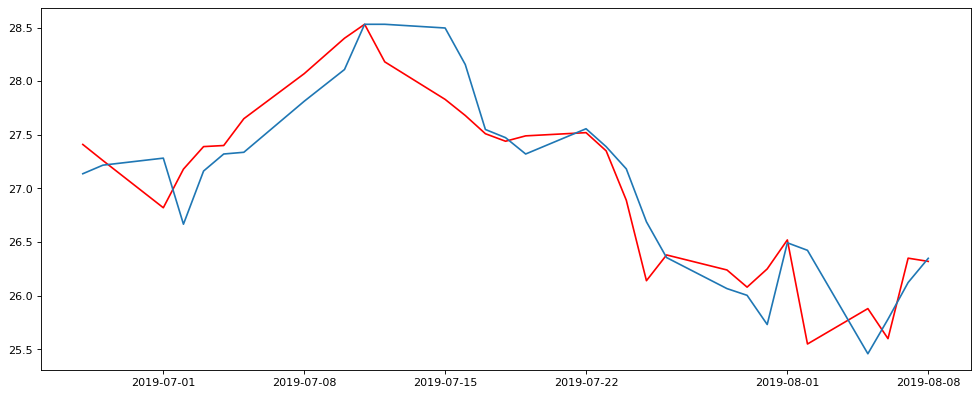

In [8]:
last_x_days = 30
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dt_pred['Date'].iloc[-last_x_days:], dt_pred['Y_atual'].iloc[-last_x_days:], color = 'red')
plt.plot(dt_pred['Date'].iloc[-last_x_days:], dt_pred['Y_pred'].iloc[-last_x_days:])
plt.show()